# BankChurners数据集

## 1.分析目的

本次分析旨在建立客户流失预测模型，通过识别高流失风险客户实施精准挽留策略，从而优化企业预算配置。

## 数据集来源

https://zenodo.org/records/4322342#.Y8OsBdJBwUE

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import figure
#%matplotlib inline

from IPython.display import Image

import re

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

from sklearn.model_selection import cross_val_score, KFold


import scipy.stats
from scipy.stats import chi2




print("Setup Complete")

Setup Complete


In [20]:
dataset = pd.read_csv("D:/github项目/数据集/BankChurners.csv")
print ('数据集:',dataset.shape)

数据集: (10127, 23)


### 该数据集包含来自消费者信用卡组合的客户信息，有10127条数据，23个字段

## 2.理解数据

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

dataset.head(10)

### 字段解释

‌1.`CLIENTNUM‌` - 客户编号（唯一标识）

‌2.`Attrition_Flag‌ `- 流失标志（二元分类目标变量）

‌3.`Customer_Age‌` - 客户年龄

‌4.`Gender‌` - 性别

‌5.`Dependent_count‌` - 家属人数

‌6.`Education_Level‌` - 教育程度

‌7.`Marital_Status‌` - 婚姻状况

‌8.`Income_Category‌` - 收入区间

‌9.`Card_Category‌ `- 信用卡等级（如普通卡/金卡等）

‌10.`Months_on_book‌` - 成为客户时长（月数）

‌11.`Total_Relationship_Count‌` - 总产品持有数

‌12.`Months_Inactive_12_mon‌` - 过去12个月不活跃月数

1‌3.`Contacts_Count_12_mon‌` - 过去12个月联系次数

‌14.`Credit_Limit‌` - 信用额度

‌15.`Total_Revolving_Bal‌` - 循环余额总额

‌16.`Avg_Open_To_Buy‌` - 平均可用信用额度

‌17.`Total_Amt_Chng_Q4_Q1‌` - Q4与Q1交易金额变化率

‌18.`Total_Trans_Amt‌` - 交易总金额

‌19.`Total_Trans_Ct‌` - 交易总次数

‌20.`Total_Ct_Chng_Q4_Q1‌` - Q4与Q1交易次数变化率

‌21.`Avg_Utilization_Ratio‌` - 平均使用率

22-23. ‌`Naive_Bayes_Classifier...‌ `- 朴素贝叶斯模型输出的两个概率值（可能是流失概率计算中间值）

## 3.数据预处理

In [22]:
# 设置显示选项（显示所有列，限制列宽）
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75

# 删除两个冗余的朴素贝叶斯特征列
dataset = dataset.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1)

In [23]:
# 检查重复项
dataset.duplicated().sum()

0

In [24]:
# 检查未知项
dataset[dataset == 'Unknown'].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

我们有未知的值：

1.教育级别

2.婚姻状况

3.收入类别

稍后可以在构建模型之前对它们进行映射或过滤

## 4.数据分析

In [25]:
# 设置matplotlib的字体参数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

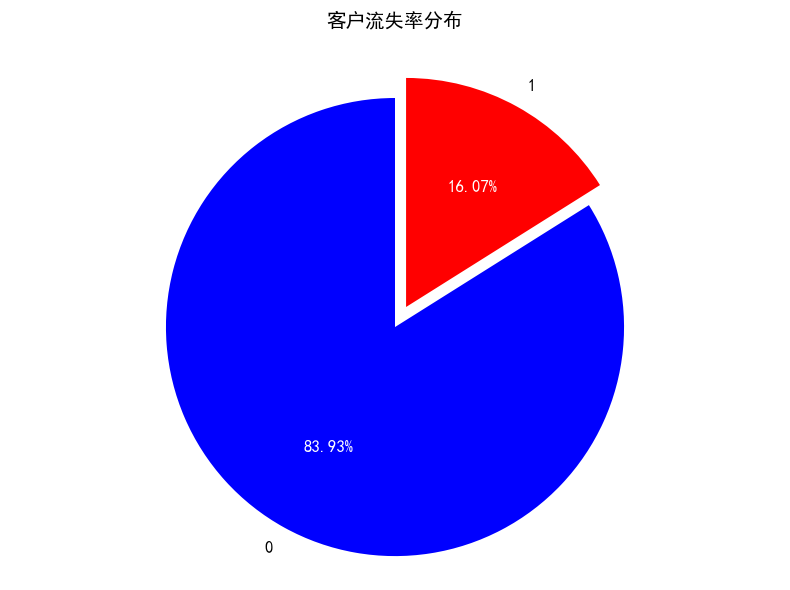

In [26]:
# 获取流失率数据并重命名标签
plt.figure(figsize=(8,6))

# 绘制饼图（设置颜色和突出效果）
patches, texts, autotexts = plt.pie(data, 
                                   colors=['blue','red'],
                                   labels=data.index,
                                   autopct='%.2f%%',
                                   startangle=90,
                                   explode=(0, 0.1),
                                   textprops={'fontsize':12})

# 设置图表样式
plt.title('客户流失率分布', fontsize=14, pad=20)
plt.axis('equal')  # 保证正圆形

# 调整百分比标签样式
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.tight_layout()
plt.show()

留存客户占比83.9%（Existing Customer）

流失客户占比16.1%（Attrited Customer）

In [27]:
#分组统计
aggdata= dataset.groupby(['Attrition_Flag'])['CLIENTNUM'].count().to_frame().reset_index()
aggdata

,Attrition_Flag,CLIENTNUM
0,Attrited Customer,1627
1,Existing Customer,8500


In [28]:
#'Attrited Customer' → 1（表示已流失客户）
#'Existing Customer' → 0（表示留存客户）
dataset['Attrition_Flag'] = dataset.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### 卡方检验

scipy.stats.chi2_contingency(cross_tab) 对交叉表进行卡方独立性检验，返回：

`chi2_stat`：卡方统计量，值越大表示观察值与期望值差异越大

`p`：p值，用于判断显著性（通常p<0.05认为显著）

`dof`：自由度(degrees of freedom)，计算公式为(行数-1)*(列数-1)

`expected frequencies`：期望频数表（假设无关联时的理论分布）

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\1039081067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', palette='Set2', data=dataset)


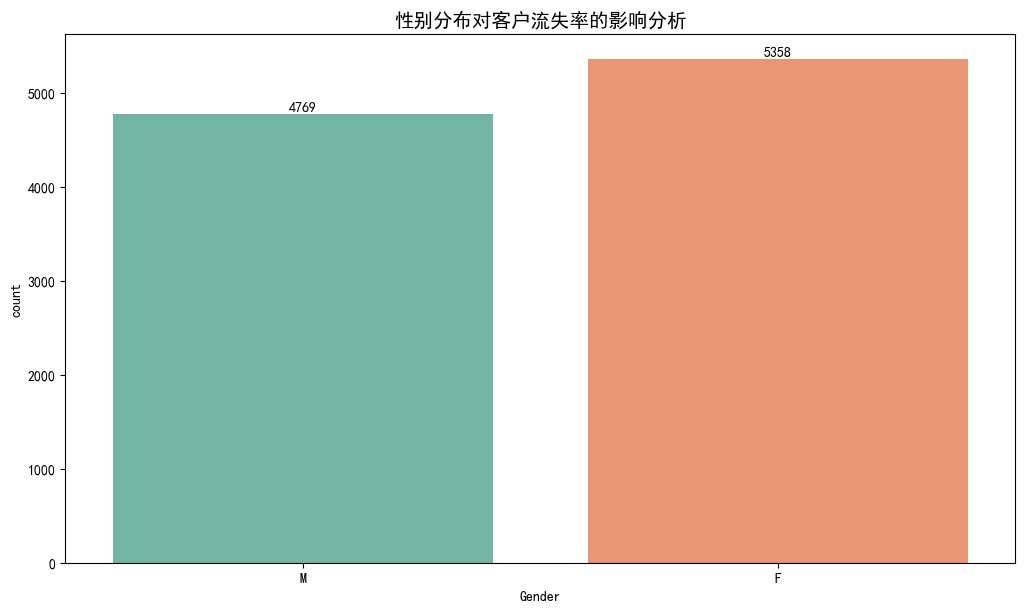

In [48]:
# 性别分布分析（带整数标签）
plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
ax = sns.countplot(x='Gender', palette='Set2', data=dataset)

# 添加整数计数标签
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('性别分布对客户流失率的影响分析', fontsize=14)
plt.tight_layout()
plt.show()

In [30]:
#统计每个性别分组中"Existing Customer"(留存客户)和"Attrited Customer"(流失客户)的绝对数量
cross_tab = pd.crosstab(index=dataset['Gender'],
                        columns=dataset['Attrition_Flag'])
#添加了normalize="index"参数，计算行方向的百分比（即每个性别组内流失/留存的比例）
cross_tab_prop = pd.crosstab(index=dataset['Gender'],
                        columns=dataset['Attrition_Flag'],
                             normalize="index")
#将性别从索引重置为普通列，使数据更适合后续分析和可视化
cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop

Attrition_Flag,Gender,0,1
0,F,0.826428,0.173572
1,M,0.853848,0.146152


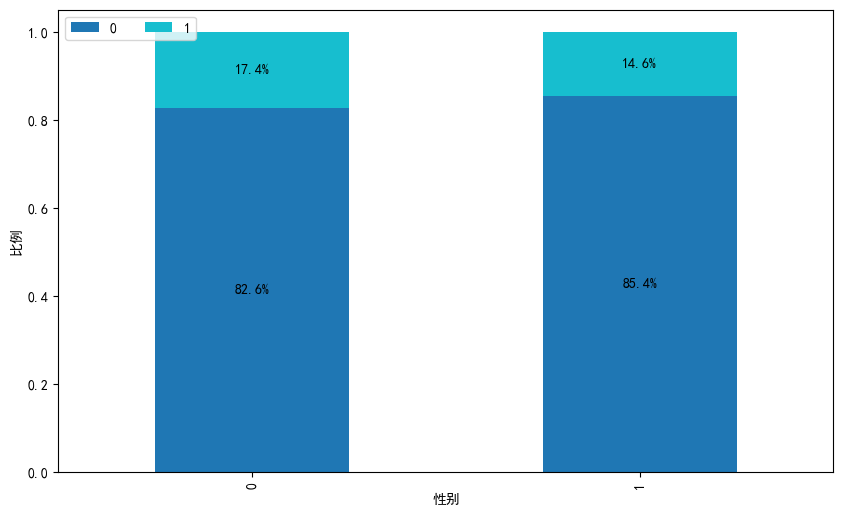

In [31]:
# 性别与客户流失状态的堆叠条形图
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("性别")
plt.ylabel("比例")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [32]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"卡方统计量:     {chi2_stat:.5g}")
print(f"p值:            {p:.5g}")
print(f"自由度(degrees of freedom): {dof}")
print("期望频数:\n",expected)

卡方统计量:     13.866
p值:            0.00019636
自由度(degrees of freedom): 1
期望频数:
 [[4497.18574109  860.81425891]
 [4002.81425891  766.18574109]]


#### 性别分布与客户流失率之间差异显著(p<0.05)¶。

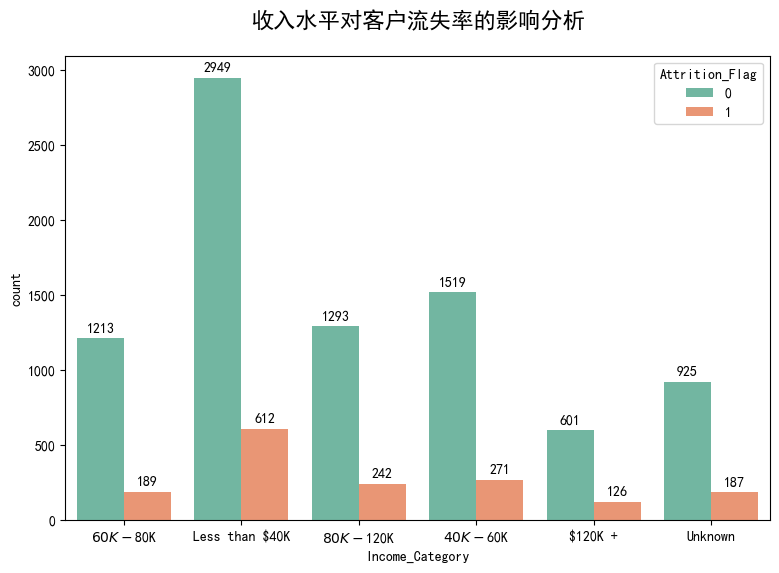

In [37]:
# 基于收入分层的客户流失行为统计（卡方检验前序分析）
plt.figure(figsize=(20,35))
plt.subplot(5,2,10)
ax = sns.countplot(x='Income_Category', hue='Attrition_Flag', palette='Set2', data=dataset)

# 添加数字标签
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d', padding=3)

# 添加主标题和格式调整
plt.title("收入水平对客户流失率的影响分析", 
          fontsize=16, pad=20, weight='bold')

plt.show()


In [39]:
# 统计收入水平和流失率的绝对数量
cross_tab = pd.crosstab(index=dataset['Income_Category'],
                        columns=dataset['Attrition_Flag'])
# 添加了normalize="index"参数，计算行方向的百分比（即每个收入水平组内流失/留存的比例）
cross_tab_prop = pd.crosstab(index=dataset['Income_Category'],
                        columns=dataset['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Income_Category,,
$120K +,0.826685,0.173315
$40K - $60K,0.848603,0.151397
$60K - $80K,0.865193,0.134807
$80K - $120K,0.842345,0.157655
Less than $40K,0.828138,0.171862
Unknown,0.831835,0.168165


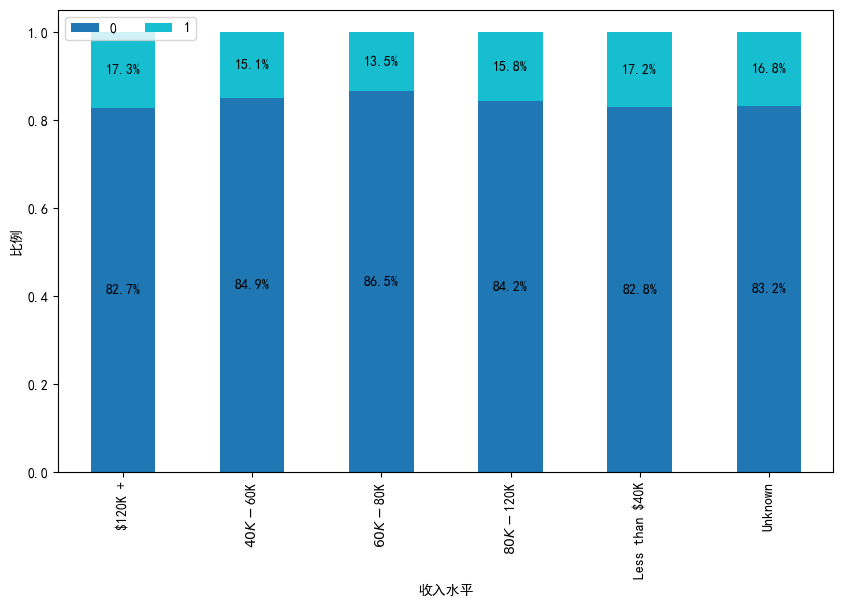

In [40]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("收入水平")
plt.ylabel("比例")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [41]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"卡方统计量:     {chi2_stat:.5g}")
print(f"p值:            {p:.5g}")
print(f"自由度(degrees of freedom): {dof}")
print("期望频数:\n",expected)

卡方统计量:     12.832
p值:            0.025002
自由度(degrees of freedom): 5
期望频数:
 [[ 610.20045423  116.79954577]
 [1502.4192752   287.5807248 ]
 [1176.75520885  225.24479115]
 [1288.38747902  246.61252098]
 [2988.89108324  572.10891676]
 [ 933.34649946  178.65350054]]


#### 收入水平与客户流失率之间差异显著(p<0.05)¶。稍后可以将此列编码为序号数字变量。

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\3021073706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Marital_Status', palette='Set2', data=dataset)


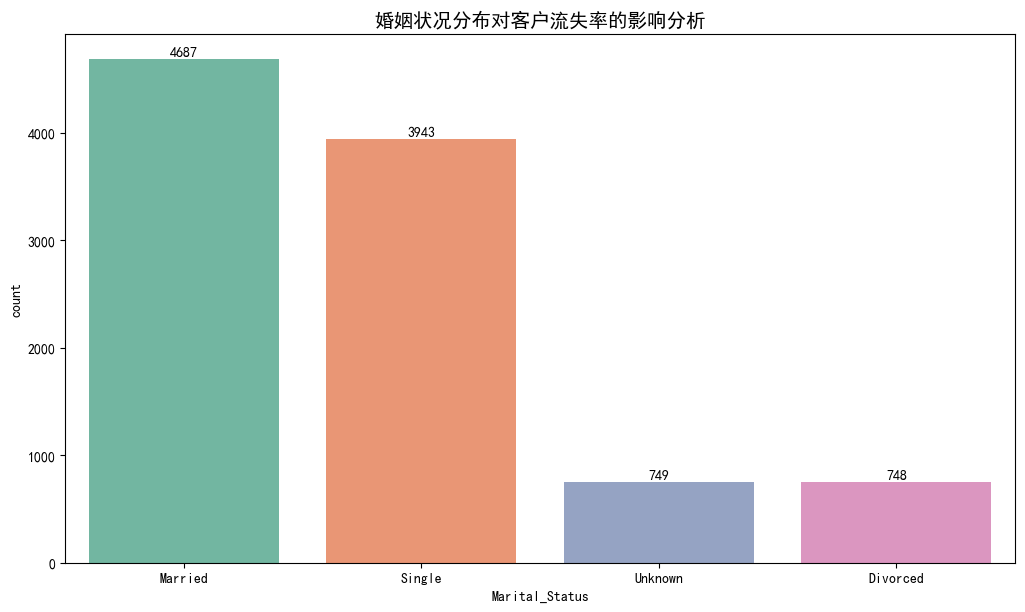

In [55]:
# 婚姻状况分析（带整数标签）
plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
ax = sns.countplot(x='Marital_Status', palette='Set2', data=dataset)

# 添加整数计数标签
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('婚姻状况分布对客户流失率的影响分析', fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
cross_tab = pd.crosstab(index=dataset['Marital_Status'],
                        columns=dataset['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=dataset['Marital_Status'],
                        columns=dataset['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Marital_Status,,
Divorced,0.838235,0.161765
Married,0.848731,0.151269
Single,0.830586,0.169414
Unknown,0.827770,0.172230


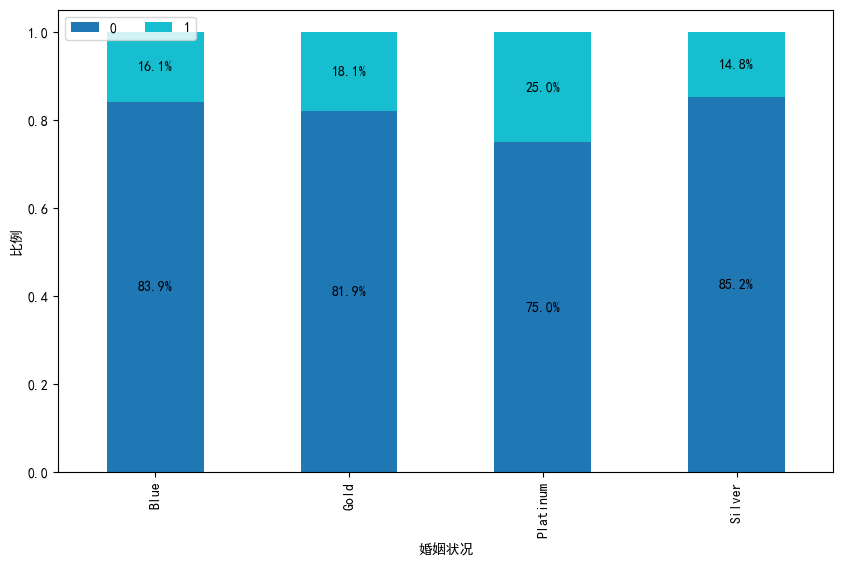

In [53]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("婚姻状况")
plt.ylabel("比例")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [46]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"卡方统计量:     {chi2_stat:.5g}")
print(f"p值:            {p:.5g}")
print(f"自由度(degrees of freedom): {dof}")
print("期望频数:\n",expected)

卡方统计量:     6.0561
p值:            0.10891
自由度(degrees of freedom): 3
期望频数:
 [[ 627.82660215  120.17339785]
 [3933.98834798  753.01165202]
 [3309.51910734  633.48089266]
 [ 628.66594253  120.33405747]]


#### 婚姻状况与客户流失率之间没有显著相关性(p>0.05)

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\4132018969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Card_Category', palette='Set2', data=dataset)


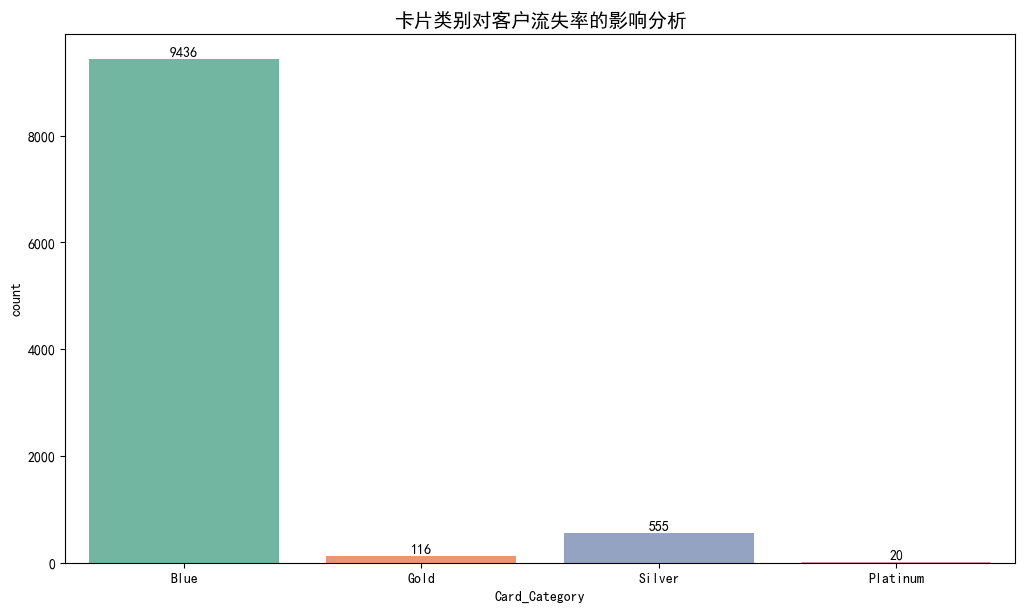

In [49]:
# 卡片类别分析（带整数标签）
plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
ax = sns.countplot(x='Card_Category', palette='Set2', data=dataset)

# 添加整数计数标签
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('卡片类别对客户流失率的影响分析', fontsize=14)
plt.tight_layout()
plt.show()

In [50]:
cross_tab = pd.crosstab(index=dataset['Card_Category'],
                        columns=dataset['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=dataset['Card_Category'],
                        columns=dataset['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Card_Category,,
Blue,0.839021,0.160979
Gold,0.818966,0.181034
Platinum,0.750000,0.250000
Silver,0.852252,0.147748


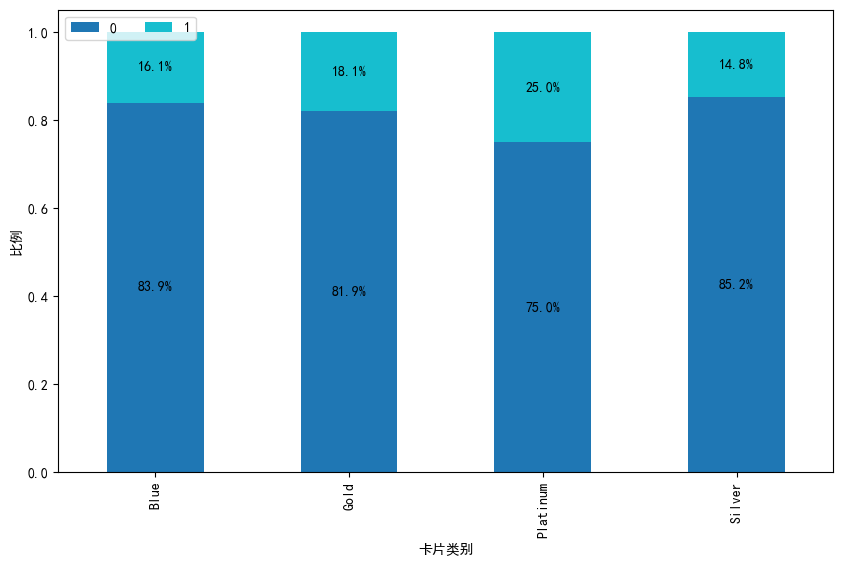

In [51]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("卡片类别")
plt.ylabel("比例")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [52]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"卡方统计量:     {chi2_stat:.5g}")
print(f"p值:            {p:.5g}")
print(f"自由度(degrees of freedom): {dof}")
print("期望频数:\n",expected)

卡方统计量:     2.2342
p值:            0.52524
自由度(degrees of freedom): 3
期望频数:
 [[7.92001580e+03 1.51598420e+03]
 [9.73634838e+01 1.86365162e+01]
 [1.67868075e+01 3.21319246e+00]
 [4.65833909e+02 8.91660906e+01]]


#### 我们可以看到，由于某些类别的观察数量较少，这一组的差异在统计学上并不显著

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\1322576451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Education_Level', palette='Set2', data=dataset)


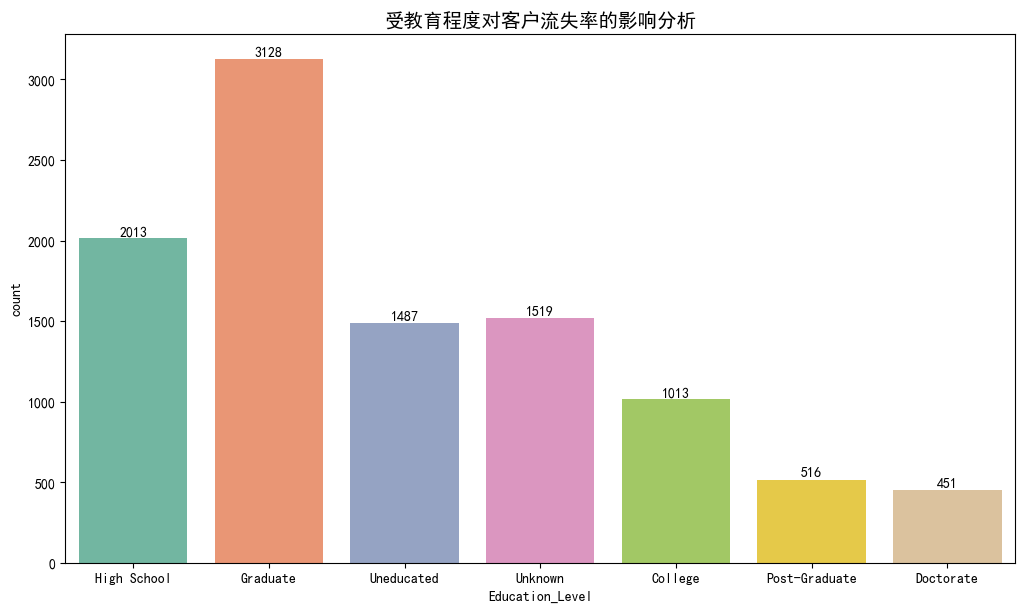

In [56]:
# 受教育程度分析（带整数标签）
plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
ax = sns.countplot(x='Education_Level', palette='Set2', data=dataset)

# 添加整数计数标签
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('受教育程度对客户流失率的影响分析', fontsize=14)
plt.tight_layout()
plt.show()

In [57]:
cross_tab = pd.crosstab(index=dataset['Education_Level'],
                        columns=dataset['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=dataset['Education_Level'],
                        columns=dataset['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Education_Level,,
College,0.847976,0.152024
Doctorate,0.789357,0.210643
Graduate,0.844309,0.155691
High School,0.847988,0.152012
Post-Graduate,0.821705,0.178295
Uneducated,0.840619,0.159381
Unknown,0.831468,0.168532


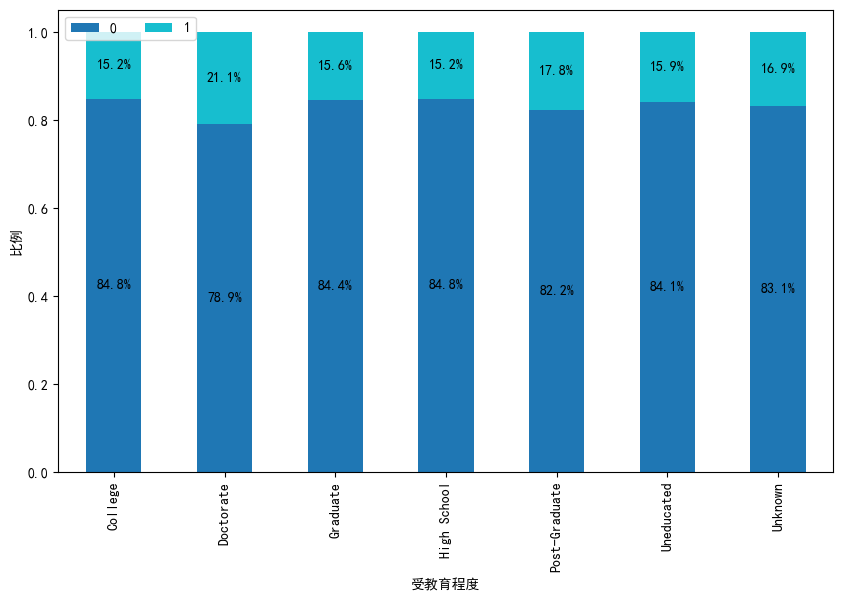

In [58]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("受教育程度")
plt.ylabel("比例")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [59]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"卡方统计量:     {chi2_stat:.5g}")
print(f"p值:            {p:.5g}")
print(f"自由度(degrees of freedom): {dof}")
print("期望频数:\n",expected)

卡方统计量:     12.511
p值:            0.051489
自由度(degrees of freedom): 6
期望频数:
 [[ 850.25180211  162.74819789]
 [ 378.54251012   72.45748988]
 [2625.45669991  502.54330009]
 [1689.59217932  323.40782068]
 [ 433.09963464   82.90036536]
 [1248.09914091  238.90085909]
 [1274.95803298  244.04196702]]


#### 受教育程度与客户流失率之间没有显著相关性(p>0.05)

选择所有行,排除'CLIENTNUM'和'Attrition_Flag_Int'列,对剩余所有数值列生成直方图

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\1805266294.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.loc[:, ~dataset.columns.isin(['CLIENTNUM', "Attrition_Flag_Int"])].hist(ax = ax)
C:\Users\27164\AppData\Local\Temp\ipykernel_16652\1805266294.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


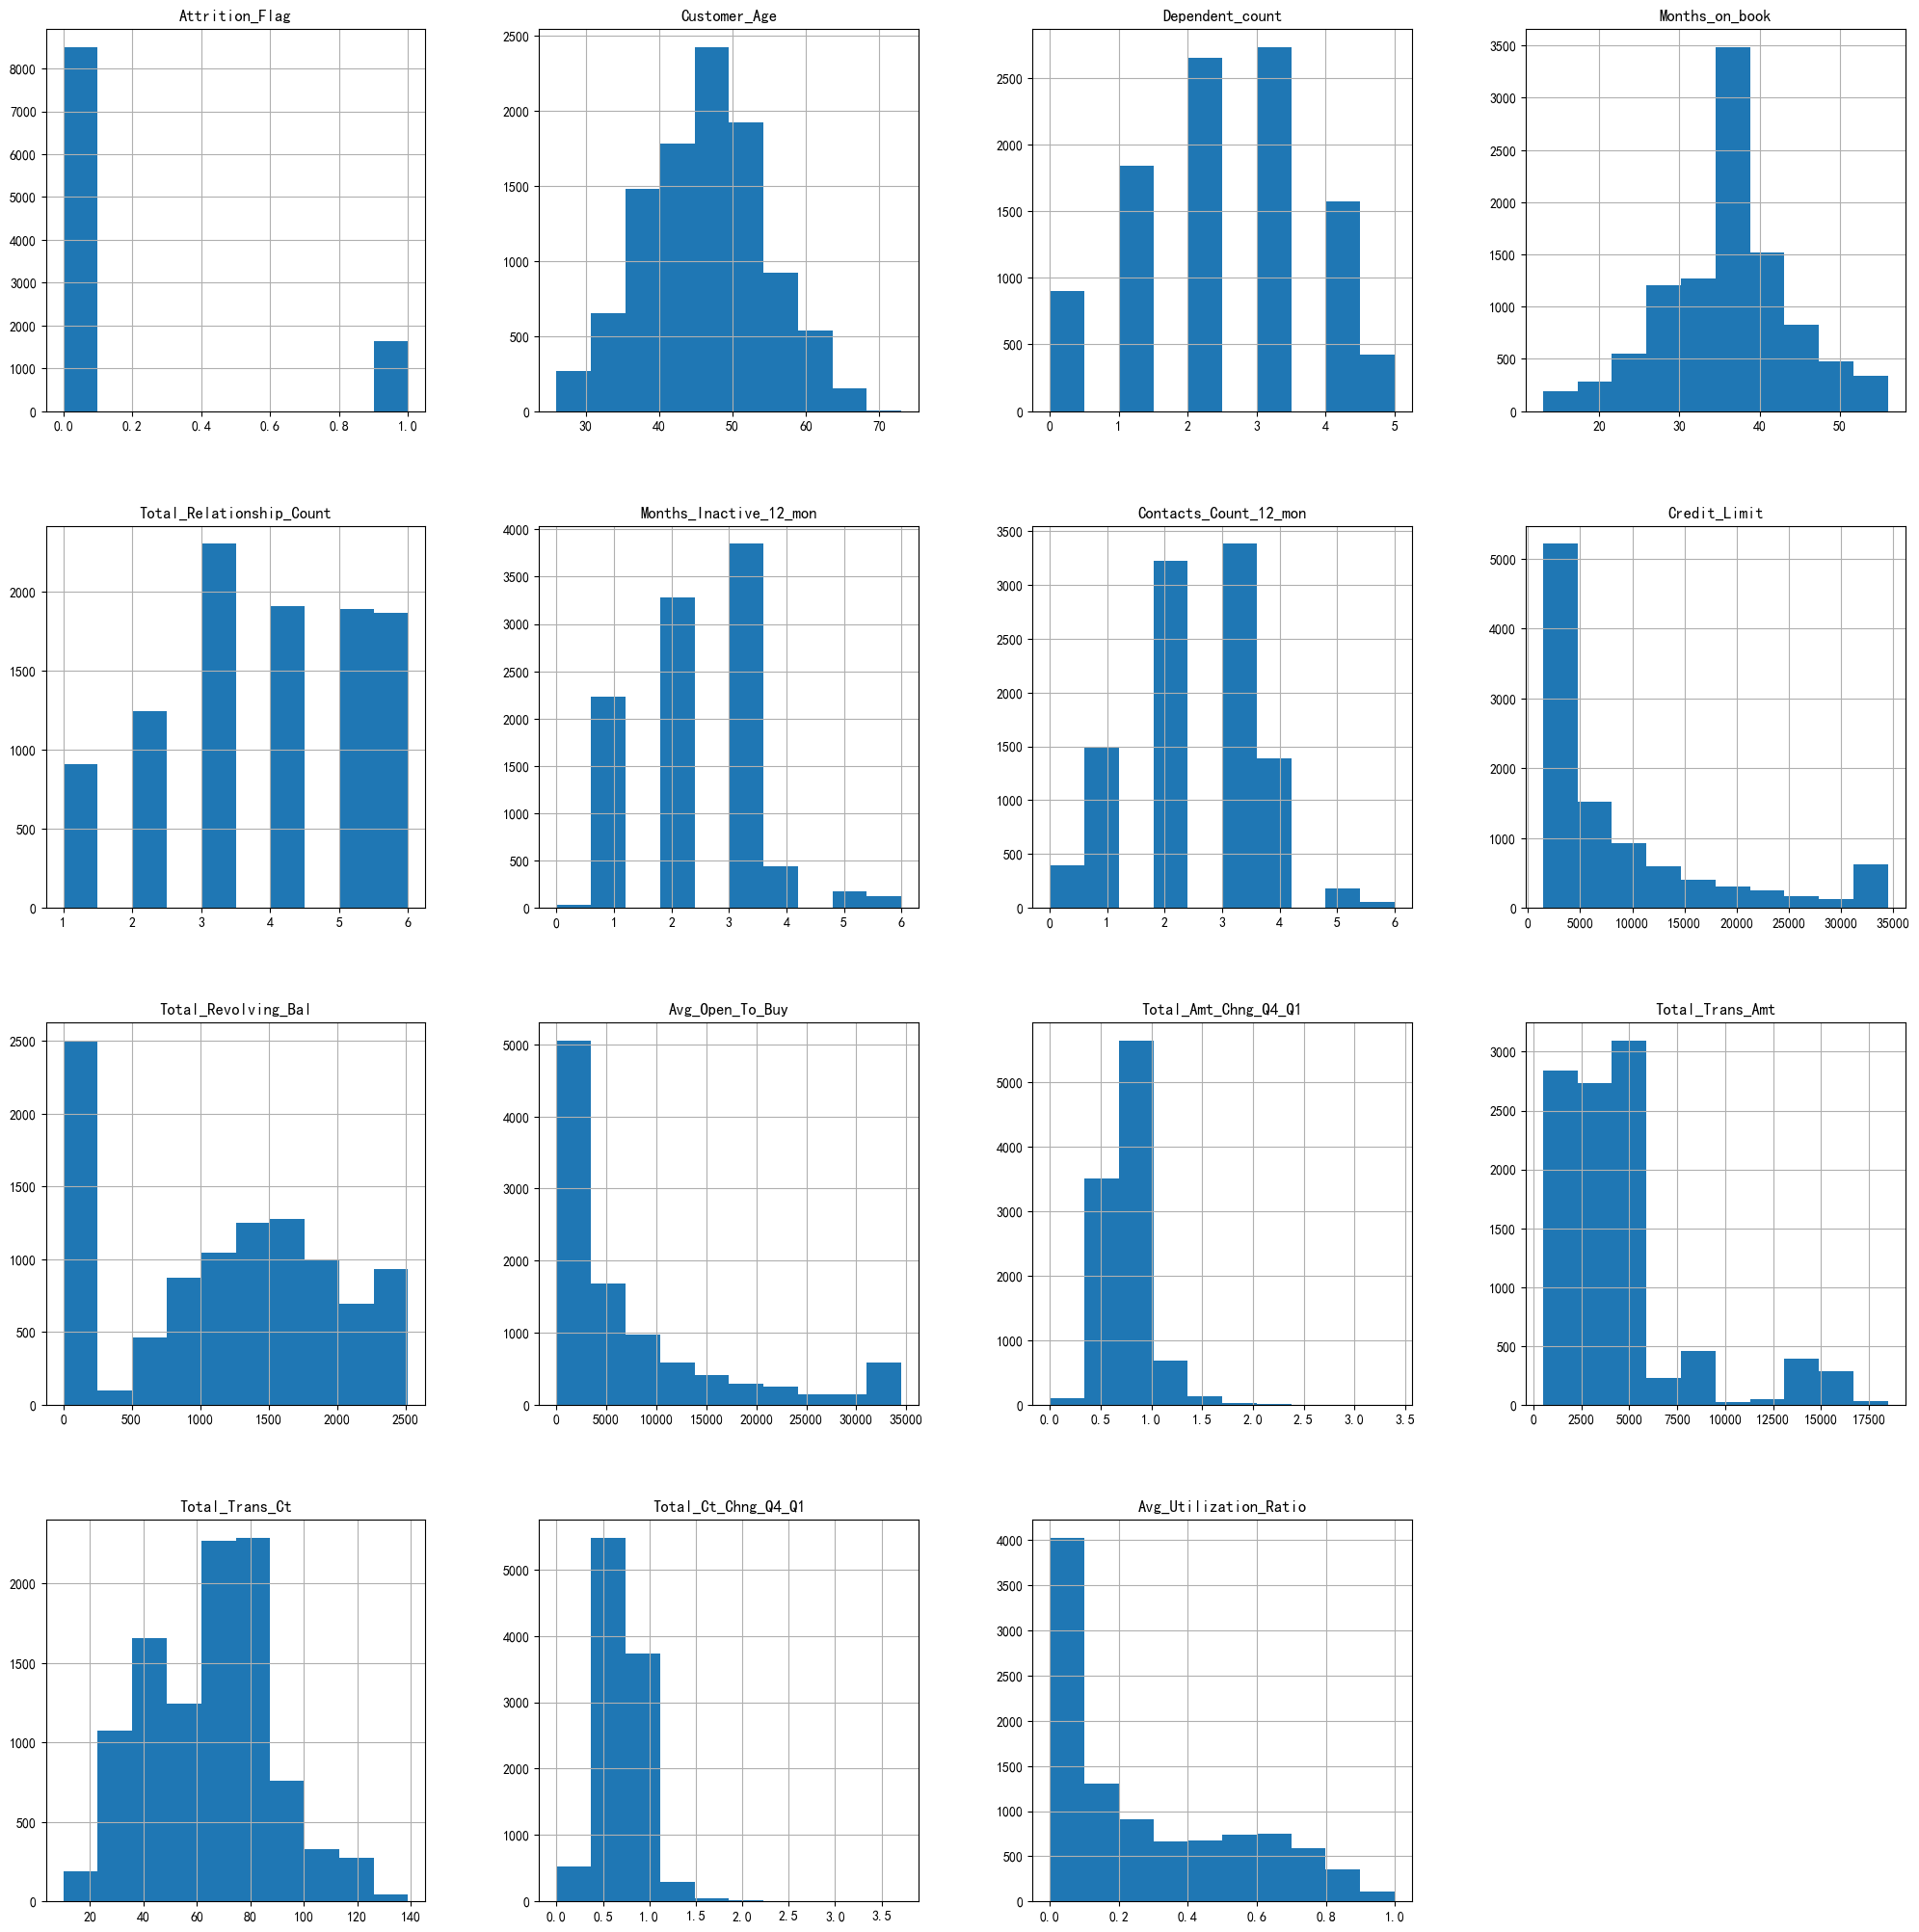

In [62]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
plt.tight_layout()
dataset.loc[:, ~dataset.columns.isin(['CLIENTNUM', "Attrition_Flag_Int"])].hist(ax = ax)
fig.show()

In [63]:
# 对数据集中除'CLIENTNUM'外的所有列进行统计
dataset.loc[:, ~dataset.columns.isin(['CLIENTNUM'])].describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### 相关矩阵

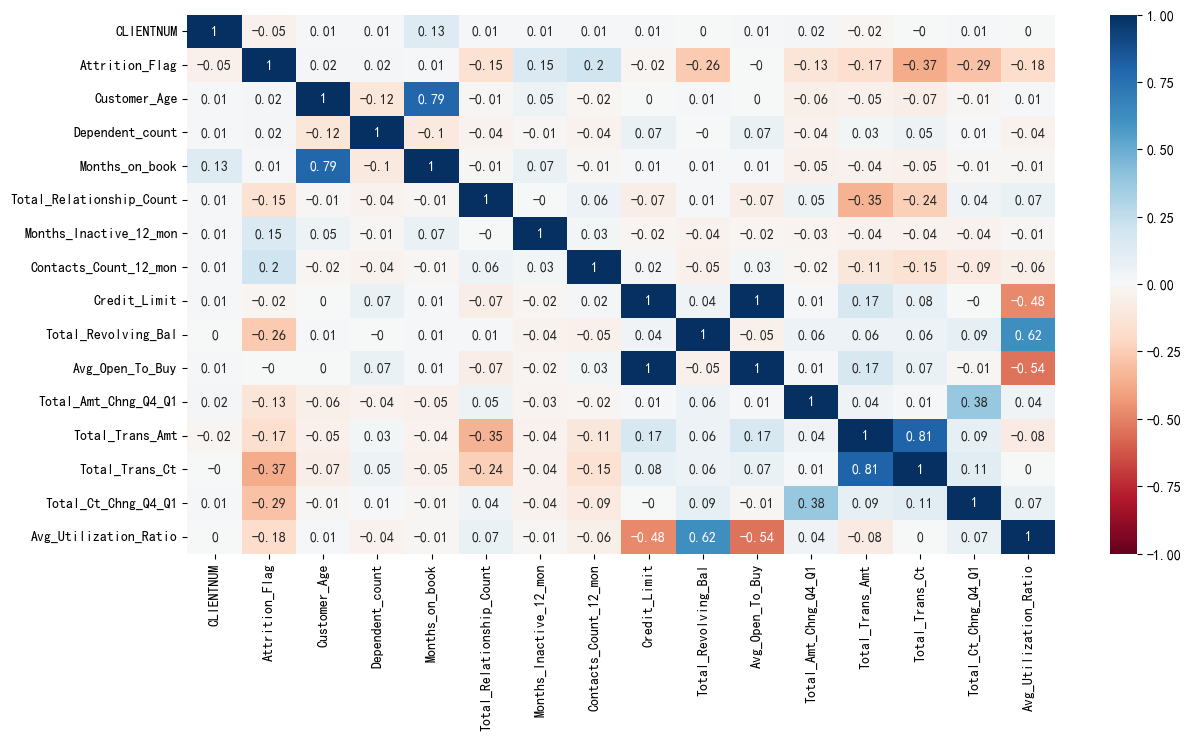

In [65]:
# 先筛选数值型列
numeric_cols = dataset.select_dtypes(include=['number']).columns
correlation = dataset[numeric_cols].corr().round(2)

plt.figure(figsize=(14,7))
sns.heatmap(correlation, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()


#### 从相关矩阵我们可以看到，

#### Revolving_balance(旋转平衡)和 avg_utilization_ratio(平均利用率) 呈正相关。

#### avg_utilization_ratio也与credit_limit和avg_open_to_puy呈负相关

#### Total_Trans_Amt和Total_Trans_Ct也呈正相关。

### 箱型图

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\2727635998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

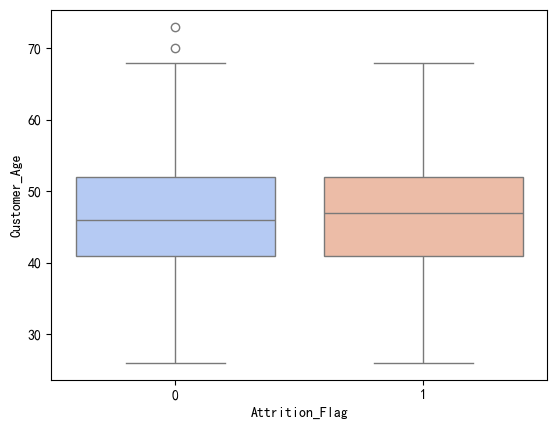

In [70]:
# 年龄与流失率
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=dataset,palette='coolwarm')

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\3688425267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Dependent_count'>

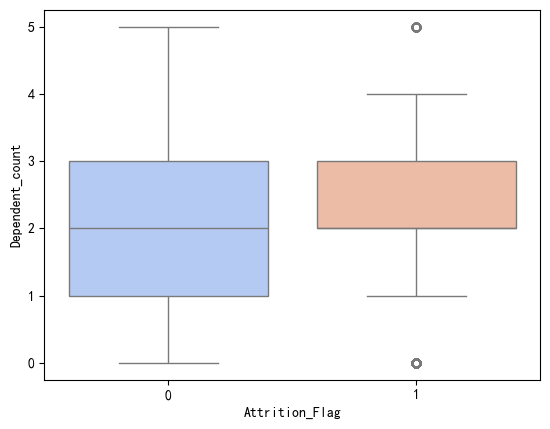

In [71]:
# 家属人数与流失率
sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=dataset,palette='coolwarm')

有差异，Dependent_count可以在模型中用作预测器

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\3614932209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

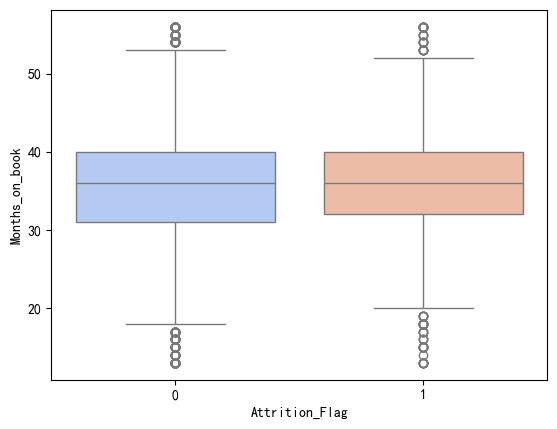

In [72]:
#成为顾客时长(月)与流失率
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=dataset,palette='coolwarm')

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\1945593810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

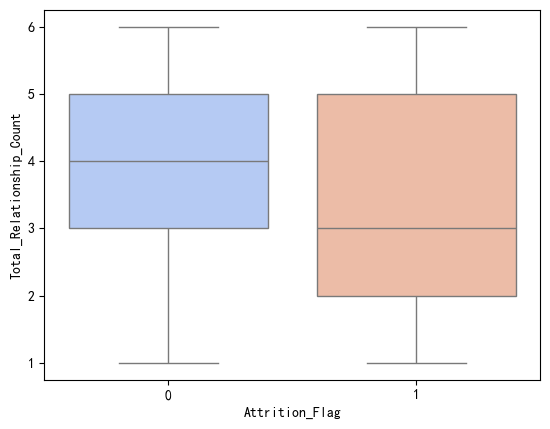

In [73]:
#总产品持有数与流失率
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=dataset,palette='coolwarm')

有差异，Total_Relationship_Count可以在模型中用作预测器

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\3514302722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

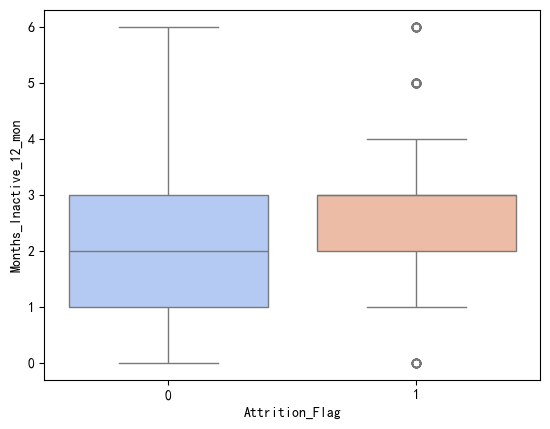

In [75]:
#过去12个月不活跃月数与流失率
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=dataset,palette='coolwarm')

有差异，Months_Inactive_12_mon可以在模型中用作预测器

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\1550245429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

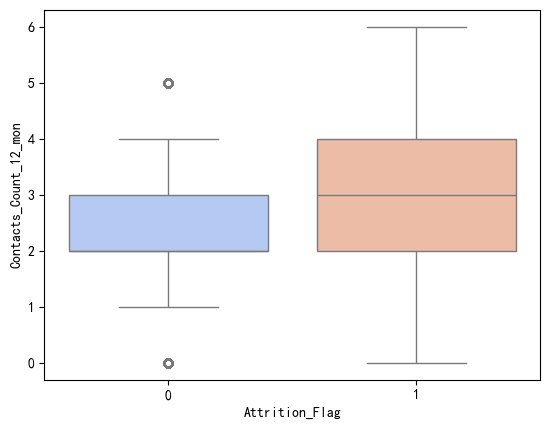

In [76]:
#过去12个月活跃月数与流失率
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=dataset,palette='coolwarm')

有差异，Contacts_Count_12_mon可以在模型中用作预测器

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\2707496875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

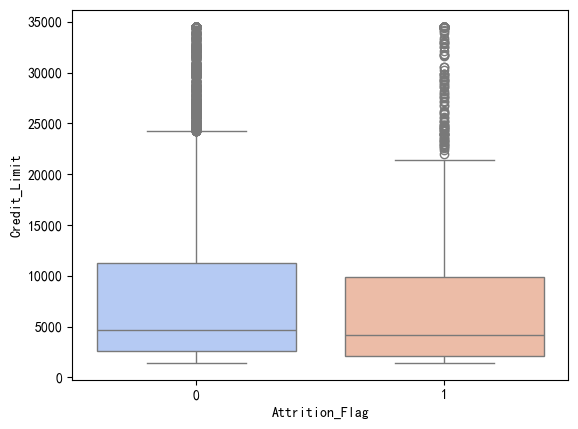

In [77]:
#信用额度数与流失率
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=dataset,palette='coolwarm')

有些许差异，Credit_Limit可以在模型中用作预测器，由于它与avg_utilization比率相关，我们应该从两者中选择一个

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\3249232148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

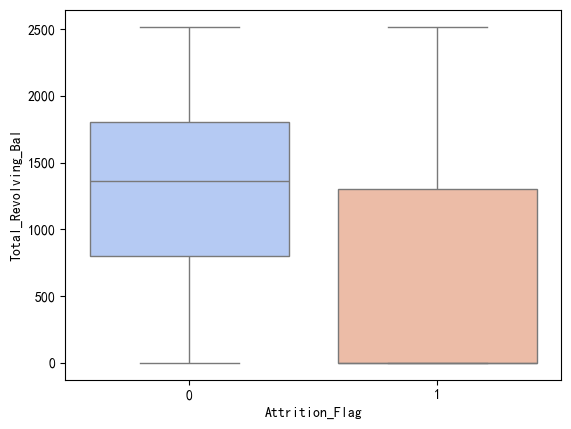

In [78]:
#循环余额总额与流失率
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=dataset,palette='coolwarm')

有差异，Total_Revolving_Bal可以在模型中用作预测器

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\540643180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

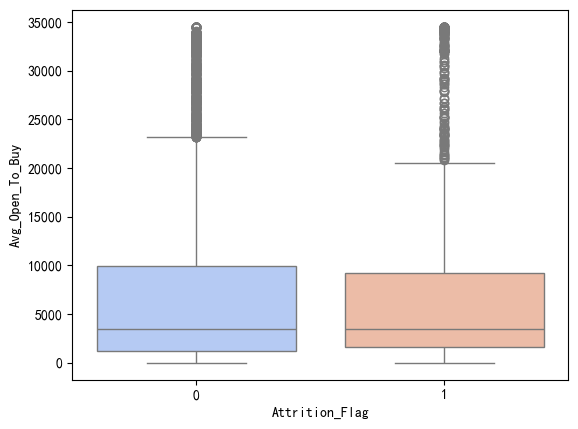

In [80]:
# 平均可用信用额度与流失率
sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=dataset,palette='coolwarm')

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\2330536018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

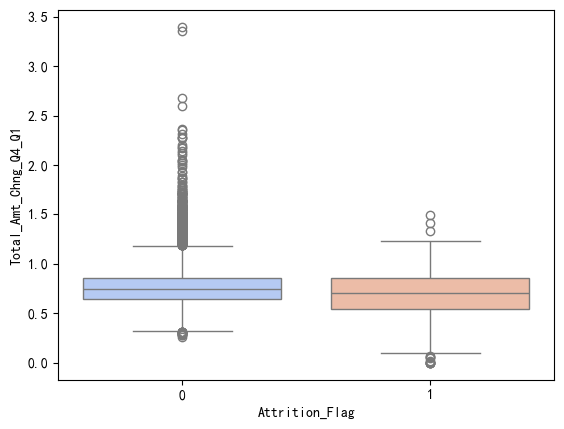

In [81]:
#Q4与Q1交易金额变化率与流失率
sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=dataset,palette='coolwarm')

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\882914158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

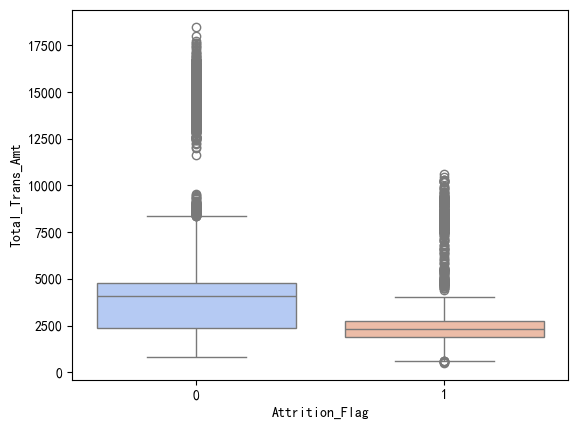

In [82]:
#交易总金额与流失率
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=dataset,palette='coolwarm')

有差异，Total_Trans_Amt可以在模型中用作预测器

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\250793378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

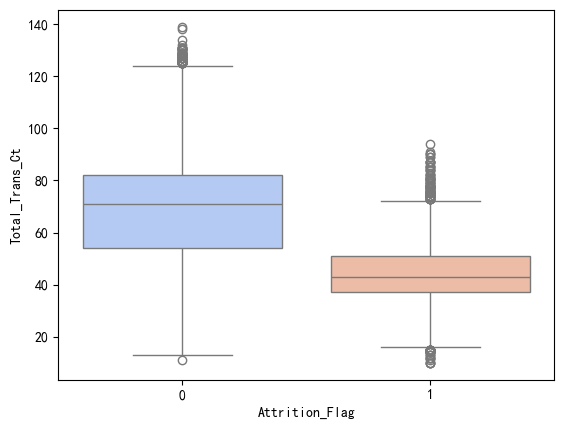

In [83]:
#交易总次数与流失率
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=dataset,palette='coolwarm')

我们观察到两组之间存在显著差异，因为交易的金额和数量是相关的，我们选择这个变量作为预测变量，并丢弃金额

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\2203329016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

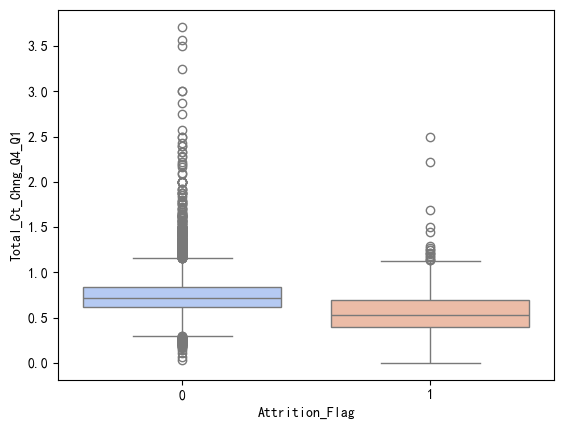

In [84]:
#Q4与Q1交易次数变化率与流失率
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=dataset,palette='coolwarm')

C:\Users\27164\AppData\Local\Temp\ipykernel_16652\3971991587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=dataset,palette='coolwarm')


<Axes: xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

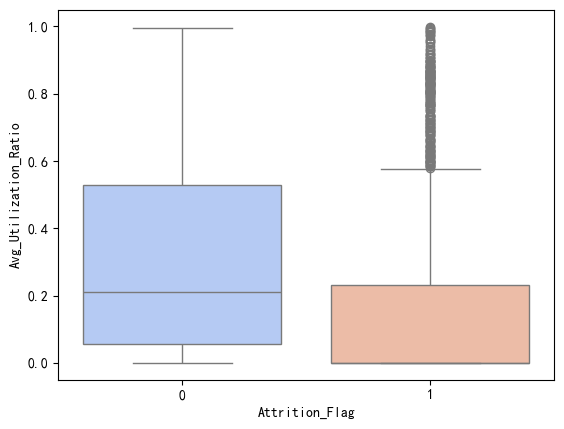

In [86]:
#平均使用次数与流失率
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=dataset,palette='coolwarm')

有差异，Avg_Utilization_Ratio可以在模型中用作预测器

### Numerics(数值型变量)

描述性统计：计算均值、中位数、标准差等

1.Dependent_count

2.Total_Relationship_Count

3.Months_Inactive_12_mon

4.Contacts_Count_12_mon

5.Total_Trans_Ct

6.Avg_Utilization_Ratio

### Categoricals(分类变量)

频数统计：计算各分类的计数和比例

1.Gender

2.Income_Category

### 1.Categoricals

In [87]:
# 提取并查看数据集中收入类别(Income_Category)列的所有唯一值
Income_Category_enc = dataset['Income_Category']
Income_Category_enc.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [88]:
# 重命名1到5
dataset['Income_Category'] =  dataset['Income_Category'].map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60K':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4, 
                                                '$120K +':5})

In [90]:
# 用scikit-learn的OneHotEncoder对分类变量进行独热编码处理
categoricals = ['Gender']

enc = OneHotEncoder(drop='first')
X = dataset[categoricals]
enc.fit(X)
enc.categories_

[array(['F', 'M'], dtype=object)]

In [91]:
# 将分类变量通过独热编码(One-Hot Encoding)转换为数值型数组
dummies = enc.transform(X).toarray()
dummies

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [92]:
dummies.shape

(10127, 1)

In [93]:
dummies_df = pd.DataFrame(dummies)
dummies_df

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


In [94]:
# 生成独热编码后的新列名的列表
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

[array(['Gender_F', 'Gender_M'], dtype=object)]

In [95]:
# 嵌套的列表推导式，用于处理独热编码后的列名列表
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['Gender_M']

In [96]:
# 为DataFrame的列名进行赋值
dummies_df.columns = col_names_drop_first
dummies_df

,Gender_M
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


### 2.Numerics

In [98]:
# 对数值型特征进行标准化处理
numericals = ['Dependent_count',
            'Total_Relationship_Count',
            'Months_Inactive_12_mon',
            'Contacts_Count_12_mon',
            'Total_Trans_Ct',
            'Avg_Utilization_Ratio',
             'Income_Category']

X = dataset[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std
0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,0.597300
1,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,-0.887628
2,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,1.339764
3,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,-0.887628
4,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,0.597300
...,...,...,...,...,...,...,...
10122,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-0.145164
10123,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-0.145164
10124,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,-0.887628
10125,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-0.145164


In [99]:
# concat函数进行DataFrame的水平合并
df_prep = pd.concat([dummies_df,
                     std_df
                     ], axis = 1)
df_prep

,Gender_M,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std
0,1.0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,0.597300
1,0.0,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,-0.887628
2,1.0,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,1.339764
3,0.0,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,-0.887628
4,1.0,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,0.597300
...,...,...,...,...,...,...,...,...
10122,1.0,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-0.145164
10123,1.0,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-0.145164
10124,0.0,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,-0.887628
10125,1.0,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-0.145164


In [101]:
X = df_prep
y = dataset.Attrition_Flag

## 朴素贝叶斯/BASELINE: NAIVE BAYES

### Training

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [103]:
# 创建高斯朴素贝叶斯分类器对象,并模拟训练过程

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [104]:
# 使用训练好的高斯朴素贝叶斯模型进行预测
y_pred = gnb.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [105]:
# 评估模型
confusion_matrix(y_test, y_pred)

array([[2066,   59],
       [ 244,  163]], dtype=int64)

真阳性(TP)、真阴性(TN)、假阳性(FP)、假阴性(FN)

[0,0]：真实负类且预测负类（TN）

[0,1]：真实负类但预测正类（FP）

[1,0]：真实正类但预测负类（FN）

[1,1]：真实正类且预测正类（TP）

In [106]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [108]:
# 准确率 = 正确预测数 / 总样本数
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

0.8803317535545023

In [109]:
# 精确率 = 真阳性 / (真阳性 + 假阳性)
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)

0.7342342342342343

In [110]:
# 召回率 = 真阳性 / (真阳性 + 假阴性)
# Recall = TP / (TP + FN)
recall_score(y_test, y_pred)

0.4004914004914005

In [111]:
# 特异性 = 真阴性 / (真阴性 + 假阳性)
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

0.9722352941176471


In [112]:
# F1分数评估指标
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

0.5182829888712241

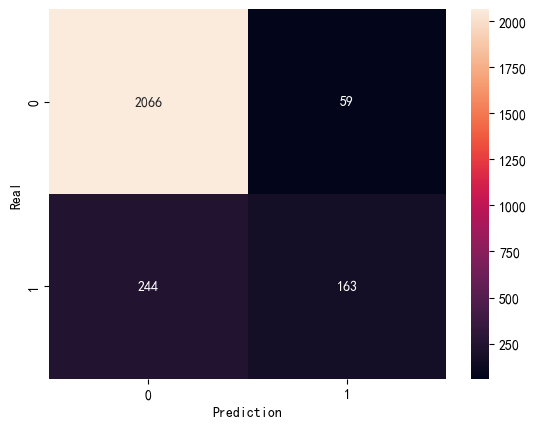

In [114]:
# 混淆矩阵
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

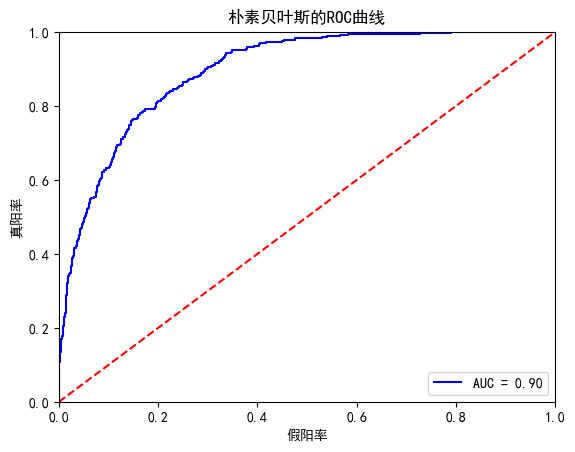

In [123]:
# ROC曲线
Y_scores = gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('朴素贝叶斯')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真阳率')
plt.xlabel('假阳率')
plt.title('朴素贝叶斯的ROC曲线')
plt.show()

## 逻辑回归/Logistic Regression

### Training

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

In [120]:
# 无正则化的逻辑回归模型训练
logistic_regression = LogisticRegression(penalty=None) 
logistic_regression.fit(X_train, y_train);

In [121]:
# 使用训练好的逻辑回归模型进行预测
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [122]:
# predict_proba()方法返回的是每个样本属于各个类别的概率矩阵，格式为numpy数组
y_pred_proba = logistic_regression.predict_proba(X_test)
y_pred_proba

array([[9.65803719e-01, 3.41962810e-02],
       [8.81635802e-01, 1.18364198e-01],
       [1.88276469e-01, 8.11723531e-01],
       ...,
       [5.59631481e-01, 4.40368519e-01],
       [5.39123423e-01, 4.60876577e-01],
       [9.99174874e-01, 8.25126212e-04]])

### Evaluation

In [124]:
# 评估模型
confusion_matrix(y_test, y_pred)

array([[2049,   76],
       [ 213,  194]], dtype=int64)

In [125]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [126]:
# 准确率 = 正确预测数 / 总样本数
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

0.8858609794628752

In [127]:
# 精确率 = 真阳性 / (真阳性 + 假阳性)
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)

0.7185185185185186

In [128]:
# 召回率 = 真阳性 / (真阳性 + 假阴性)
# Recall = TP / (TP + FN)
recall_score(y_test, y_pred)

0.47665847665847666

In [129]:
# 特异性 = 真阴性 / (真阴性 + 假阳性)
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

0.9642352941176471


In [130]:
# F1分数评估指标
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

0.5731166912850812

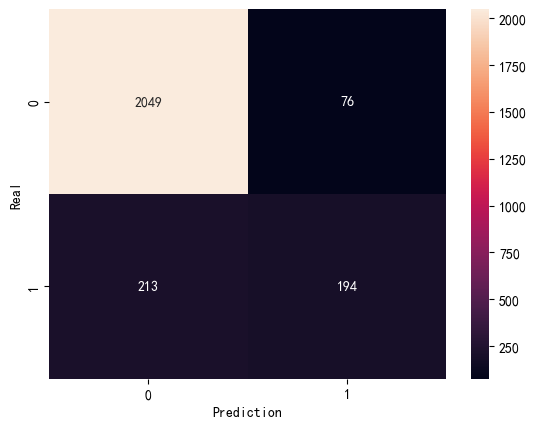

In [131]:
# 混淆矩阵
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

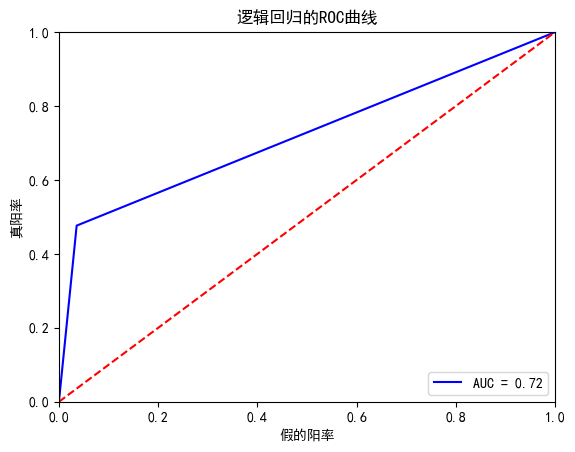

In [132]:
Y_scores = logistic_regression.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('逻辑回归')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真阳率')
plt.xlabel('假的阳率')
plt.title('逻辑回归的ROC曲线')
plt.show()

## KNN

#### 1.通过交叉验证评估KNN模型在不同k值下的表现

#### 2.自动计算每个k值的平均准确率和标准差

#### 3.返回包含置信区间的DataFrame

### Training

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [134]:
# 评估KNN模型在不同邻居数(k值)下性能
def scores_knn(X, y, start,stop,step):
    
    scores_list = []
    
    for i in range(start,stop,step):
        
        model = KNeighborsClassifier(n_neighbors=i)

        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        dict_row_score = {'mean_score':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        scores_list.append(dict_row_score)
    
    df_scores = pd.DataFrame(scores_list)
    
    df_scores['lower_bound'] = df_scores['mean_score'] - df_scores['score_std']
    df_scores['upper_bound'] = df_scores['mean_score'] + df_scores['score_std']
    
    return df_scores

In [135]:
# 调试
# 测试k值从1到20的性能表现
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

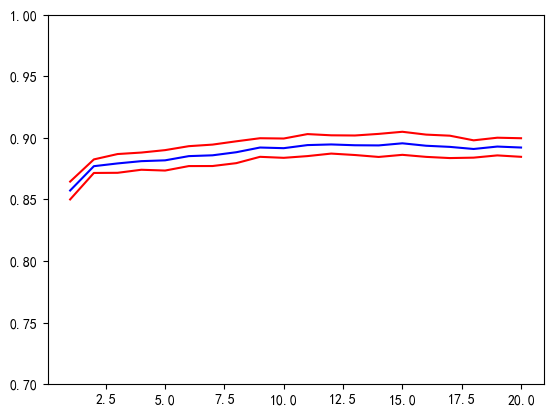

In [136]:
# 可视化结果
plt.plot(df_scores['n_neighbours'], df_scores['lower_bound'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['mean_score'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['upper_bound'], color='r')
plt.ylim(0.7, 1);

In [137]:
# 调参
# 查找KNN模型中表现最佳的k值参数
df_scores.loc[df_scores.mean_score == df_scores.mean_score.max()]

,mean_score,score_std,n_neighbours,lower_bound,upper_bound
14,0.895592,0.009356,15,0.886235,0.904948


In [138]:
# 最佳的k参数
best_k = df_scores.loc[df_scores.mean_score == df_scores.mean_score.max(),'n_neighbours'].values[0]
best_k

15

In [139]:
# 用最佳的k值15训练KNN模型
model = KNeighborsClassifier(n_neighbors=best_k)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [140]:
y_pred = model.predict(X_test)

### Evaluation 

In [141]:
# 评估模型
confusion_matrix(y_test, y_pred)

array([[2074,   51],
       [ 189,  218]], dtype=int64)

In [142]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [143]:
# 准确率 = 正确预测数 / 总样本数
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

0.9052132701421801

In [144]:
# 精确率 = 真阳性 / (真阳性 + 假阳性)
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)

0.8104089219330854

In [145]:
# 召回率 = 真阳性 / (真阳性 + 假阴性)
# Recall = TP / (TP + FN)
recall_score(y_test, y_pred)

0.5356265356265356

In [146]:
# 特异性 = 真阴性 / (真阴性 + 假阳性)
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

0.976


In [147]:
# F1分数评估指标
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

0.6449704142011834

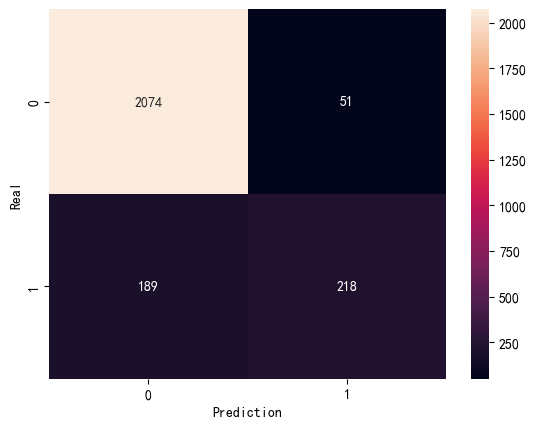

In [148]:
# 混淆矩阵
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

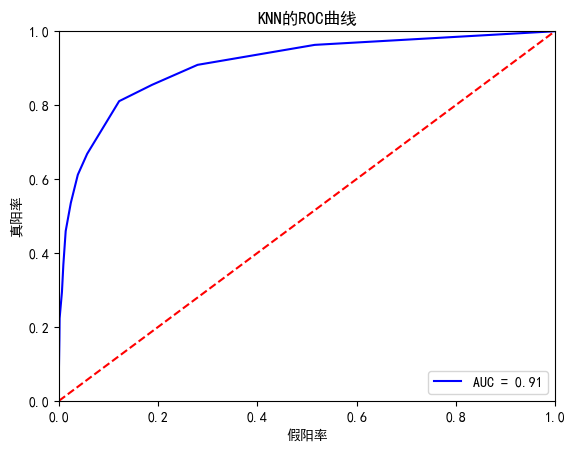

In [149]:
y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('K近邻算法')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真阳率')
plt.xlabel('假阳率')
plt.title('KNN的ROC曲线')
plt.show()

# 结论

### 逻辑回归和KNN两个模型的表现都比朴素贝叶斯好

### 考虑到我们目的识别潜在流失客户，模型的核心评估指标应当是召回率（敏感度）——当我们准备开展定制化客户保留活动时，只要不错失真实流失客户（True Positives），误将忠诚客户识别为流失对象（False Positives）并非首要问题。

### 逻辑回归模型虽与KNN模型的召回率表现持平，但KNN模型在精确度与综合性能上更胜一筹。因此，我们将选择KNN模型作为潜在流失风险用户的识别模型。